# K- Nearest Neighbors Classifier - the Random Dataset

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs

## Generating database

In [2]:
inputs, target = make_blobs(n_samples = 1000, 
                            centers = [(-3,3),(0,0),(2,2)],
                            random_state = 365)

In [3]:
inputs.shape, target.shape

((1000, 2), (1000,))

In [4]:
data = pd.DataFrame(data=inputs, columns= ['Feature 1', 'Feature 2'])
data['Target'] = target
data

,Feature 1,Feature 2,Target
0,1.630460,2.094029,2
1,-2.811252,3.852241,0
2,0.501051,1.582531,2
3,-3.624112,3.325318,0
4,-3.278106,2.359416,0
...,...,...,...
995,-4.412271,2.420197,0
996,0.398022,-0.847863,1
997,-0.588974,0.317711,1
998,-2.328593,4.957489,0


## Plotting database

In [5]:
import seaborn as sns

knn_palette = sns.color_palette(['#000C1F' , '#29757A' , '#FF5050'])
knn_palette

[(0.0, 0.047058823529411764, 0.12156862745098039),
 (0.1607843137254902, 0.4588235294117647, 0.47843137254901963),
 (1.0, 0.3137254901960784, 0.3137254901960784)]

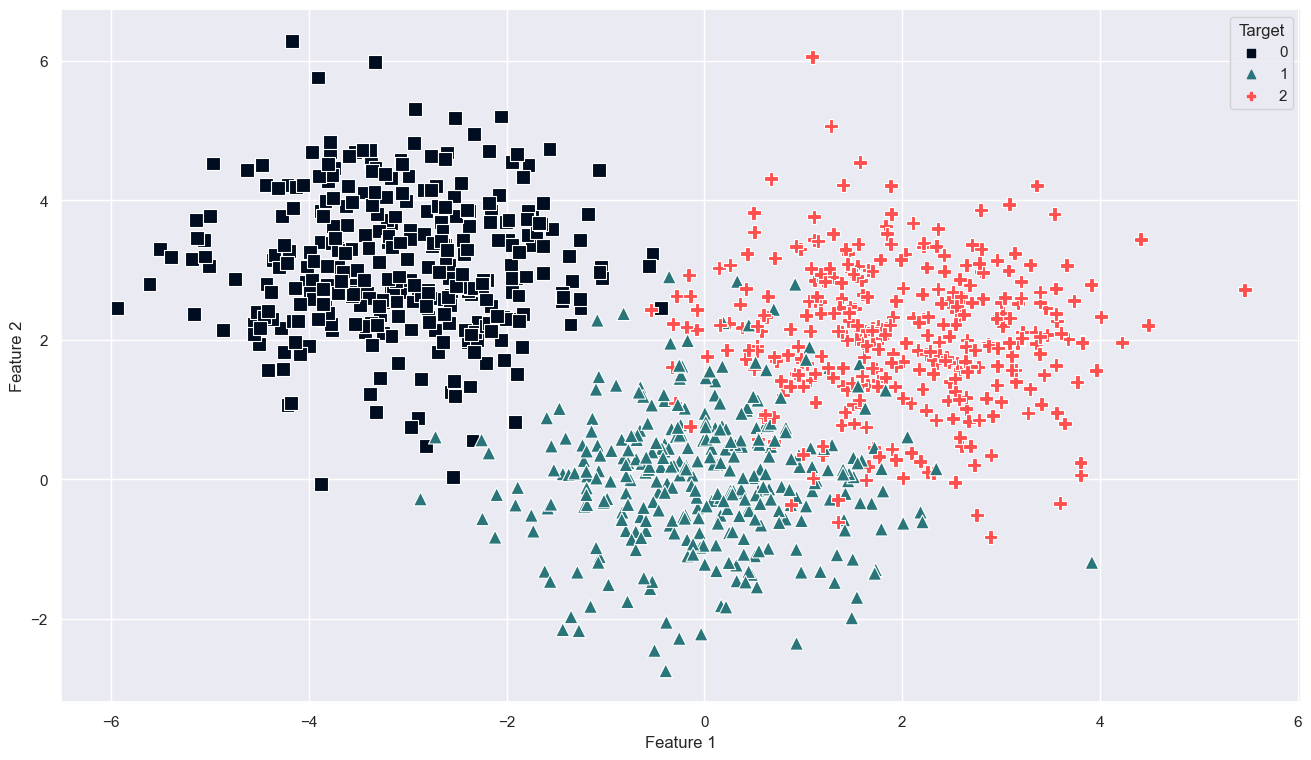

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(16,9))

sns.scatterplot(x='Feature 1', y='Feature 2', 
                data=data,
                hue = 'Target', palette = knn_palette, 
                markers = [',','^','P'],
                style = 'Target',
                s = 100);

## Visualizing the distribution of the points

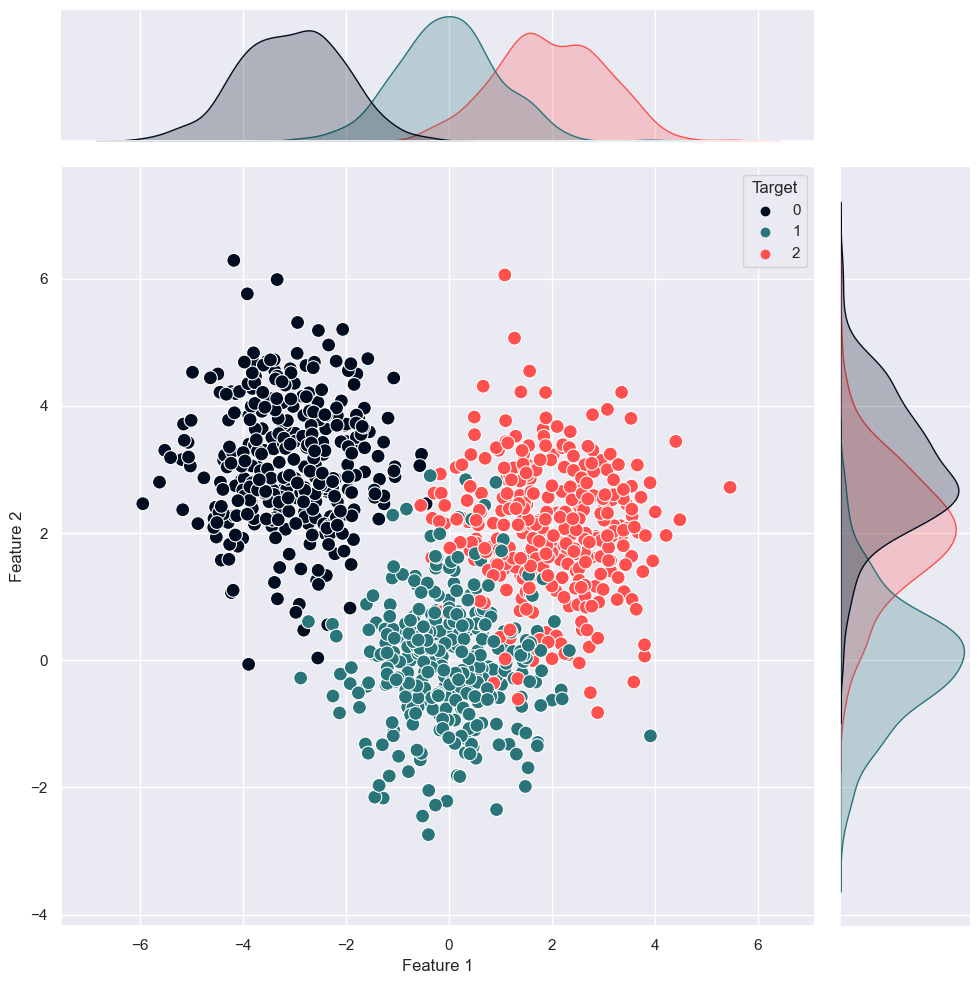

In [7]:
sns.set()

sns.jointplot(x='Feature 1', y='Feature 2', 
                data=data,
                hue = 'Target', 
                height = 10,
                palette = knn_palette, 
                s = 100,
                legend = True);

## Creating a train-test split

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, target, 
                                                    test_size = 0.2,
                                                    random_state = 365,
                                                    stratify = target) 

## Creating the model

In [9]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 30, weights = 'uniform')

clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

## Predicting a sample

In [10]:
feature_1 = -0.18
feature_2 = 3.2

In [11]:
clf.predict([[feature_1, feature_2]])
#assigned to class 2

array([2])

In [12]:
neighbors = clf.kneighbors([[feature_1, feature_2]])
neighbors

#the first array stores the euclidean distance from point O to the nearest neighbor
#the second stores the index of this neighbor in a training dataset

(array([[0.27086818, 0.34749744, 0.40387913, 0.45668128, 0.57370524,
         0.58002987, 0.6147827 , 0.62680551, 0.76674656, 0.77233172,
         0.78175021, 0.84541382, 0.8741025 , 0.8769993 , 0.89014688,
         0.91521046, 0.92223527, 0.99986243, 1.01649367, 1.0231371 ,
         1.03996308, 1.04075309, 1.05202214, 1.05586882, 1.10512231,
         1.14601178, 1.15303035, 1.16564948, 1.16938942, 1.16964811]]),
 array([[336, 215, 679, 221, 690, 688, 269, 309, 543, 100,  79, 161, 708,
         613, 216, 291, 561, 748, 516, 140, 514, 399,  25, 255, 431,   0,
         386, 458,   3, 304]], dtype=int64))

## Visualizing the neighbors

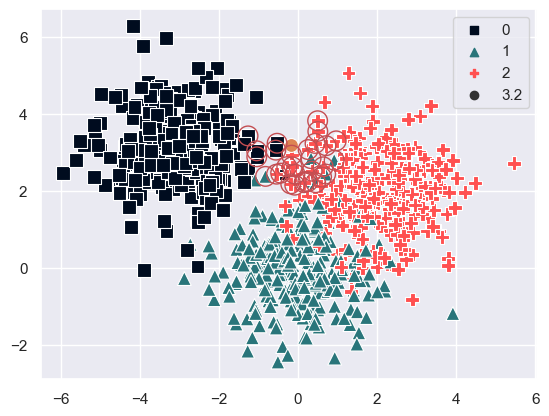

In [13]:
sns.set()

sns.scatterplot(x = x_train[:, 0], y = x_train[:,1], # x is x coordinate of x_train, y is y coordinate
                hue = y_train, 
                palette = knn_palette,
                markers = [',','^','P'],
                style = y_train,
                s = 100,
                legend = True);

#put point o on the plot
sns.scatterplot(x = [feature_1], y = [feature_2], 
                style = [feature_2],
                markers = ['o'],
                s = 100,
                legend = True);

#incircle the neighbor coming nearest to point o
plot_x_train = []
plot_y_train = []

for i  in neighbors[1]: #loop through all nearest neighbors
    plot_x_train.append(x_train[i,0]) #retrieve coordinates of all nearest neighbors
    plot_y_train.append(x_train[i,1])

sns.set()
plt.scatter(plot_x_train, #plot a circle at the respective places
           plot_y_train,
           s=200, facecolors='none', edgecolors='r');

Two nearest neighbors are assigned to class 2 and class 0. But why class 0, the second nearest neighbors could also be of class 2 because it seems like it is equally near to point o.

## Getting the parameter of the model

In [14]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 30,
 'p': 2,
 'weights': 'uniform'}

## Drawing the decision regions

In [15]:
from mlxtend.plotting import plot_decision_regions
import time

In [16]:
x_train.shape

(800, 2)

Time elapsed: 70.7 seconds


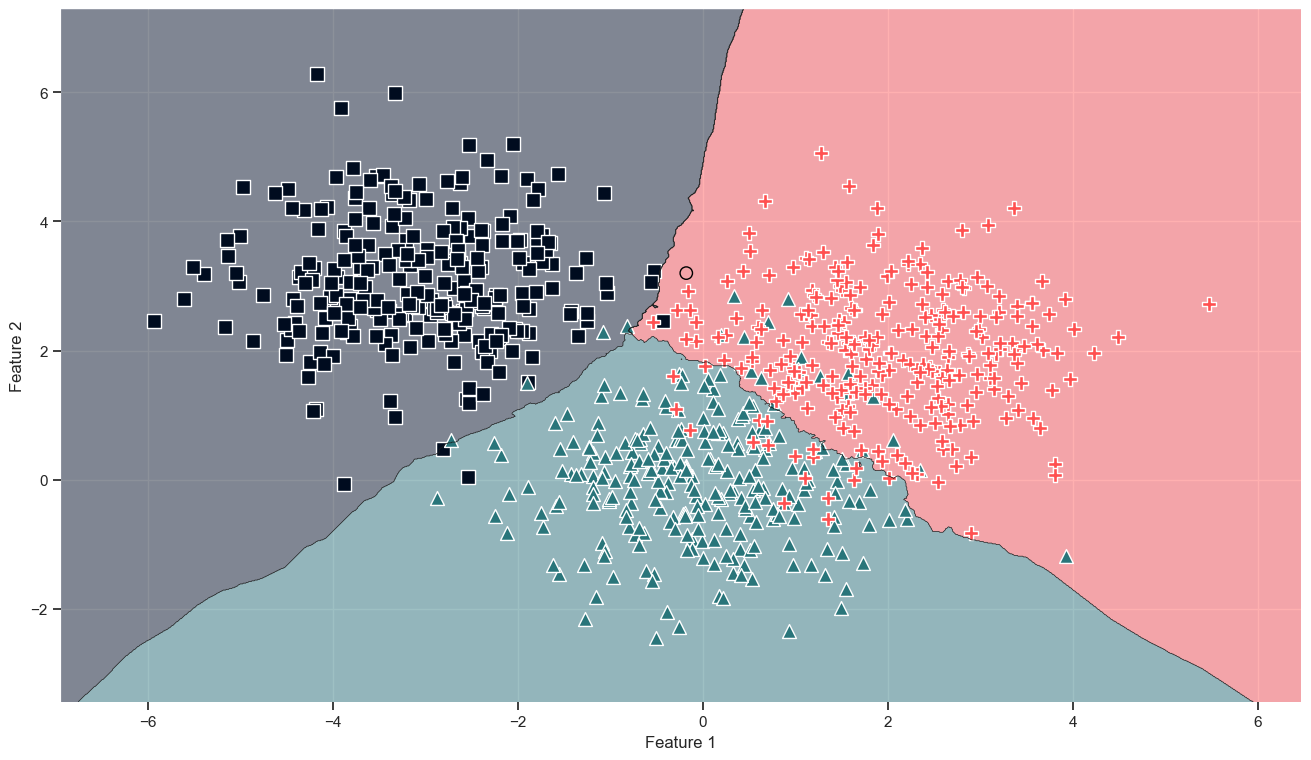

In [17]:
start = time.time()

plt.figure(figsize = (16,9))

plot_decision_regions(X = x_train, y = y_train, 
                      X_highlight=np.array([[feature_1, feature_2]]), 
                      clf = clf,
                      markers = [',','^','P'],
                      colors = '#000c1f,#29757a,#ff5050',
                      scatter_kwargs = {'s': 100, 'edgecolor': 'white', 'alpha': 1},
                      legend = 0
                     )

plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

end = time.time()

print(f'Time elapsed: {round(end - start, 1)} seconds')

A datapoint point falling in the grey region will be classified as a square, the one that falls in the bottom green region will be classified as a triangle.
Similarly, a datapoint having coordinates withiin the orange/pink region will be classified as a plus.


Change the value of n_neighbors of the classifier and rerun the decision region cell again for different values. You'll see that for very low values (k=1) the model is (a) Sensitive to changes in the training data. (b) Likely to overfit. (c) Poor performance on new datasets (d) Low bias

For a greater value, like in this case we have n_neighbors (k=30), you can see that (a) decision boundries are smoother (b) model is not affected by background noise (c) model is not affected by new data points, But, (d) had Tendency to misclassify points. They're know to have (e) low variance, but, (f) high bias

## Getting the error rates of a set of models

In [18]:
from sklearn.metrics import accuracy_score

error_uniform = [] #error rates from models with uniformly distributed weights
error_distance = [] #error ratest from models with distance-based weights

k_range = range(1,51)

for k in k_range:
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    clf.fit(x_train, y_train)
    predictions = clf.predict (x_test)
    error_uniform.append(1 - accuracy_score(y_test, predictions))
    
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    clf.fit(x_train, y_train)
    predictions = clf.predict (x_test)
    error_distance.append(1 - accuracy_score(y_test, predictions))

## Plotting the error rates as a function of the number of neighbors

Text(0, 0.5, 'Error rate')

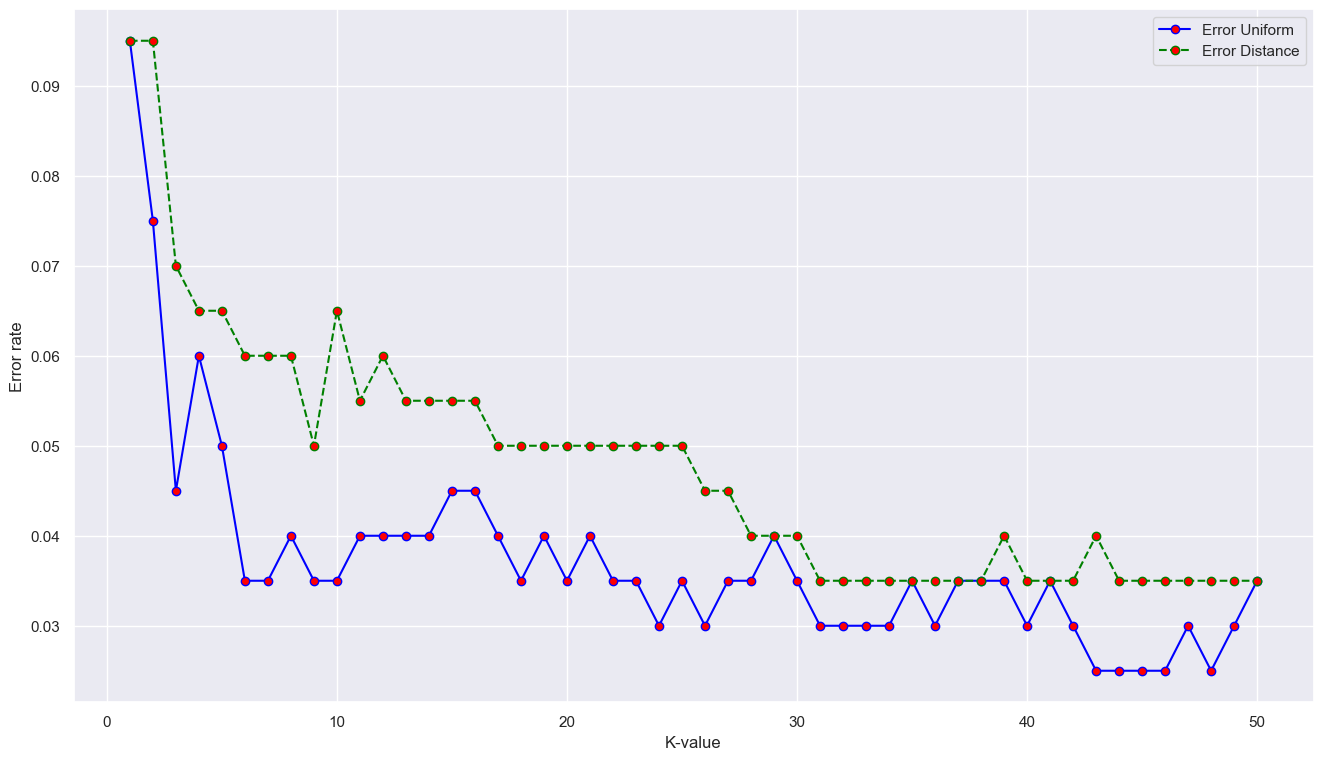

In [19]:
plt.figure(figsize=(16,9))

plt.plot(k_range, error_uniform, c = 'blue', linestyle = 'solid',
         marker = 'o', markerfacecolor = 'red', label = 'Error Uniform')

plt.plot(k_range, error_distance, c = 'green', linestyle = 'dashed',
         marker = 'o', markerfacecolor = 'red', label = 'Error Distance')

plt.legend()

plt.xlabel('K-value')
plt.ylabel('Error rate')

# GridSearchCV

## Choosing a set of parameters to test

In [20]:
parameters = {'n_neighbors': range(1,51), 
              'weights':['uniform','distance']}

## Create an instance of the GridSearchCV class

In [21]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                            param_grid = parameters, 
                            scoring = 'accuracy',)

In [22]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [23]:
grid_search.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [24]:
clf = grid_search.best_estimator_

In [25]:
clf

KNeighborsClassifier(n_neighbors=10)

In [26]:
grid_search.best_score_ #mean of all accuracies obtained during cross-validation

0.9512499999999999

## Make predictions on the test dataset

In [31]:
y_test_pred = clf.predict(x_test)
y_test_pred.shape

(200,)

## Construct the confusion matrix

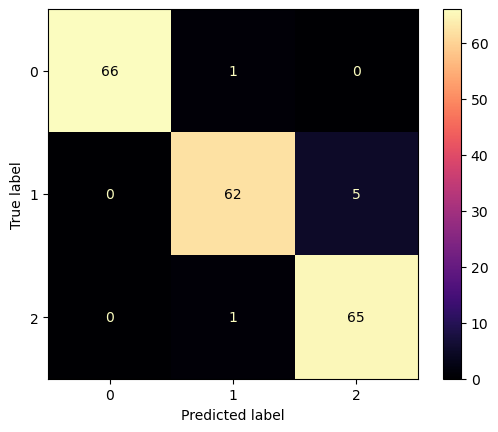

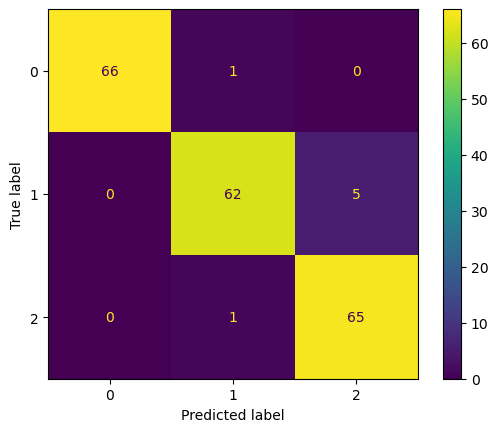

In [44]:
#confusion_matrix1= confusion_matrix(y_test, y_test_pred)
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
).plot()
plt.show()

## Print out the classification report

In [45]:
print(classification_report(y_test, y_test_pred, target_names = ['0', '1', '2']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.97      0.93      0.95        67
           2       0.93      0.98      0.96        66

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200

